/Users/ykwon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


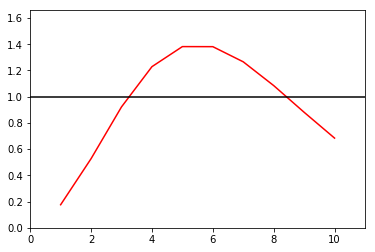

{'coefs': {'a': array([5.11824154e+02, 2.55472798e+02, 1.27077901e+02, 6.27711223e+01,
         3.06181004e+01, 1.46186293e+01, 6.73418405e+00, 2.91536330e+00,
         1.12262179e+00, 3.67584315e-01]),
  'b': array([0.17584621, 0.52720215, 0.92209937, 1.22887769, 1.38189955,
         1.38137071, 1.26581595, 1.0846367 , 0.87737821, 0.63241569]),
  'c': array([            inf, 1.18529459e+241, 1.53967178e+120, 5.54918333e+059,
         3.33142112e+029, 2.58124819e+014, 7.18505142e+006, 1.19875079e+003,
         1.54104645e+001, 1.58103921e+000]),
  'prec': array([0.99923462, 0.99923462, 0.99923462, 0.99923462, 0.99923462,
         0.99923462, 0.99923462, 0.99923543, 1.00247691, 1.16247691]),
  'preczero': 0.999234615593336},
 'p': array([0.17584621, 0.52720215, 0.92209937, 1.22887769, 1.38189955,
        1.38137071, 1.26581595, 1.08463909, 0.88100909, 0.68403418])}

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

def solveeq (VpT, sigmaepsilon, sigmaV, sigmaS, gamma, theta, Ttot):
    precp = np.zeros(Ttot)
    b = np.zeros(Ttot)
    c = np.zeros(Ttot)
    precp[Ttot-1] = 1/VpT
    b[Ttot-1] = Ttot/(sigmaepsilon**2) * (Ttot/sigmaepsilon**2 + precp[Ttot-1])**(-1)
    c[Ttot-1] = gamma * (Ttot/(sigmaepsilon**2) + precp[Ttot-1])**(-1)
    for t in range(1, Ttot):
        s = Ttot - t
        precp[s-1] = precp[s] - (b[s]/c[s])**2/(sigmaS**2)
        b[s-1] = (1+theta)*(s/sigmaepsilon**2) * \
        (((1+theta)**(Ttot-s-1) - b[s])/precp[s] * (b[s]/c[s])**2 * (1/sigmaS**2) + b[s])/\
        (s/sigmaepsilon**2 + precp[s] - (b[s]/c[s])**2/sigmaS**2)
        c[s-1] = gamma * (((1+theta)**(Ttot-s-1) - b[s])/precp[s] * (b[s]/c[s])**2 * (1/sigmaS**2) + b[s])**2\
        *((s/sigmaepsilon**2 + precp[s] - (b[s]/c[s])**2/sigmaS**2)**(-1) + (c[s]/b[s])**2 * sigmaS**2)
    
    preczero = precp[0] - (b[0]/c[0])**2/sigmaS**2
    if preczero < 0:
        preczero = np.Inf
    a = np.exp(np.log(1+theta)*np.arange(Ttot-1, -1, -1)) - b
    return {'preczero':preczero, 'b':b ,'c':c, 'a':a, 'prec':precp}

def priceplot (sigmaepsilon, sigmaV, sigmaS, gamma, theta, Ttot, maxprec = 300., lengthgrid = 3000, toplot = False):
    Vpgrid = np.exp(np.arange(np.log(1/maxprec), np.log(2*sigmaV**2),\
                              (np.log(2*sigmaV**2)-np.log(1/maxprec))/lengthgrid))
    netout = np.zeros(len(Vpgrid))

    for k in range(0, len(Vpgrid)):
        temp = solveeq(Vpgrid[k], sigmaepsilon, sigmaV, sigmaS, gamma, theta, Ttot)
        netout[k] = temp['preczero']
        
    tempind = np.argmin(abs(netout - 1/sigmaV**2))
    finalVp = Vpgrid[tempind]
    coefV = solveeq(finalVp, sigmaepsilon, sigmaV, sigmaS, gamma, theta, Ttot)
    p = np.zeros(Ttot)
    E = np.zeros(Ttot)
    S = np.zeros(Ttot)
    # compute price path for zero shock

    for t in range(0, Ttot):
        E[t] = 1/sigmaS**2*sum((coefV['b'][0:(t+1)]/coefV['c'][0:(t+1)])**2) * 1/coefV['prec'][t]
        p[t] = coefV['a'][t] * E[t] + coefV['b'][t] 
    if toplot:
        plt.plot(np.arange(1, Ttot+1), p, 'r-')
        plt.axis([0, Ttot+1, 0, max(1.2*max(p), 1.2)])
        plt.axhline(y=1, color='black', linestyle='-')
        plt.show()
    return({'coefs': coefV, 'p': p})

sigmaepsilon = np.sqrt(5)
sigmaV = 1.
sigmaS = 1.
gamma = 5.
theta = 1
Ttot = 10
priceplot(sigmaepsilon, sigmaV, sigmaS, gamma, theta, Ttot, maxprec = 1000., lengthgrid = 5000, toplot = True)

In [99]:
theta = 0.5
b = np.arange(1, 11)
c = np.arange(1, 11)
precp = np.arange(1, 11)
s = 4
sigmaepsilon = np.sqrt(5)
sigmaV = 1.
sigmaS = 1.
gamma = 0.5
theta = 0
Ttot = 10
maxprec = 300.
lengthgrid = 20
Vpgrid = np.exp(np.arange(np.log(1/maxprec), np.log(2*sigmaV**2),\
                              (np.log(2*sigmaV**2)-np.log(1/maxprec))/lengthgrid))
len(Vpgrid)
Vpgrid

array([0.00333333, 0.00458972, 0.00631966, 0.00870165, 0.01198144,
       0.01649744, 0.0227156 , 0.03127747, 0.04306647, 0.05929892,
       0.08164966, 0.11242475, 0.15479948, 0.21314594, 0.29348413,
       0.4041031 , 0.55641617, 0.76613854, 1.05490869, 1.45252104])

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def method.3 (VpT, sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot):
    precp = [0]*Ttot
    b = [0]*Ttot
    c = [0]*Ttot
    precp[Ttot-1] = 1/VpT
    b[Ttot-1] = Ttot/sigma.epsilon**2 * (Ttot/sigma.epsilo**2 + prec.p[Ttot])^(-1)
    c[Ttot-1] = gamma * (Ttot/sigma.epsilon^2 + prec.p[Ttot])^(-1)
    return b

  
    prec.p[t] = prec.p[t+1] - (b[t+1]/c[t+1])^2/sigma.S^2
    b[t] = (1+theta)*(t/sigma.epsilon^2) *
      (((1+theta)^(Ttot - t - 1) - b[t+1])/prec.p[t+1]*(b[t+1]/c[t+1])^2*(1/sigma.S^2) + b[t+1])/
      (t/sigma.epsilon^2 + prec.p[t+1] - (b[t+1]/c[t+1])^2/sigma.S^2)
    c[t] = gamma* (((1+theta)^(Ttot - t - 1) - b[t+1])/prec.p[t+1]*(b[t+1]/c[t+1])^2*(1/sigma.S^2) + b[t+1])^2 *
      ((t/sigma.epsilon^2 + prec.p[t+1] - (b[t+1]/c[t+1])^2/sigma.S^2)^(-1) + (c[t+1]/b[t+1])^2*sigma.S^2)
  }

  if (preczero < 0){
    preczero = Inf
  }
  return(list(preczero = preczero, b = b, c = c, precV = prec.p, a = exp(log(1+theta)*((Ttot-1):0)) - b))
}
price.plot = function(sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot, maxprec = 300, lengthgrid = 3000){
  Vpgrid = seq(from = log(1/maxprec), to = log(2*sigma.V^2), length.out = lengthgrid)
  Vpgrid = exp(Vpgrid)
  net.out = rep(NA, length(Vpgrid))
  for (k in 1:length(Vpgrid)){
    temp.out = method.3(Vpgrid[k], sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot)
    net.out[k] = temp.out$preczero
  }
  temp.ind = which.min(abs(net.out - 1/sigma.V^2))
  final.Vp = Vpgrid[temp.ind]
  coef.V = method.3(final.Vp, sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot)
  # compute price path for zero shock
  p = rep(NA, Ttot)
  E = rep(NA, Ttot)
  S = rep(0, Ttot)#rnorm(Ttot, sd = sigma.S)
  for (t in 1:Ttot){
    E[t] = 1/sigma.S^2*sum((coef.V$b[1:t]/coef.V$c[1:t])^2) * 1/coef.V$precV[t]
    p[t] = coef.V$a[t] * E[t] + coef.V$b[t] 
  }
  p = c(0, p)
  
  return(list(coefs = coef.V, p = p))
}
sigma.epsilon = sqrt(5)
sigma.V = 1
sigma.S = 1
gamma = 0.5
theta = 1
T.list = 15:6
Ttot = 16
p1 = price.plot(sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot, maxprec = 100000, lengthgrid = 10000)
plot(p1$p, type = "l")
print(p1$coefs$preczero)
for (t in 1:length(T.list)){
  Ttot = T.list[t]
  p1 = price.plot(sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot, maxprec = 100000, lengthgrid = 10000)
  aug.p = c(p1$p, rep(NA, max(T.list)+1 - length(p1)))
  lines(aug.p)
  print(p1$coefs$preczero)
}

# theta going from 0 to 2
# sigma.epsilon ranges from....0.1 to 10
# gamma= 0.5 .... 0.1 to 10
# T = 3

# simulating volume
# uncertainty of prices comes from overlapping information.

sigma.epsilon = sqrt(5)
sigma.V = 1
sigma.S = 1
gamma = 0.5
theta = 1
Ttot = 10
p1 = price.plot(sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot, maxprec = 100000, lengthgrid = 10000)

sigma.epsilon = sqrt(5)
sigma.V = 1
sigma.S = 1
gamma = 0.5
theta = 0
Ttot = 10
p2 = price.plot(sigma.epsilon, sigma.V, sigma.S, gamma, theta, Ttot, maxprec = 100000, lengthgrid = 10000)

SyntaxError: invalid syntax (<ipython-input-36-c57f2bae5c76>, line 4)

1


In [4]:
plot(y)

NameError: name 'plot' is not defined